## Physics 3. Laboratory experiment #2. Sound waves. 

Dr. Ernst Uzhansky, 2024, v0.1.1

Outline of the lab:
#### Day 1
1. Measuring the velocity of a sound wave in air
2. Measuring the speed of sound in different gases
3. Eigenfrequencies
#### Day 2
4. Resonator and standing waves

## Import libraries 

In [3]:
import matplotlib.pyplot as plt  # for plotting figures and setting their properties
import numpy as np  # math functions
import scipy  # scientific functions
from scipy.optimize import curve_fit as cfit  # non-linear curve fitting
from scipy.stats import linregress  # contains linregress (for linear regression)
from sklearn.metrics import r2_score  # import function that calculates R^2 score

### Part 1. Measuring the velocity of a sound wave in air using phase shift

First, let's check frequency response of the buzzer and pick adequate frequency. Look at amplitude-frequency plots in the instruction list (ח.	נספח מספר 1:). Since we are intersted in smooth phase shifts and you will change the distance between the buzzer and the microphone manualy, we will work here in the frequency range of several thousands Hz. Find the highest frequency in the range 3000 - 5000 Hz. 

Make several measurements in the vicinity of the chosen frequency, plot it and choose frequency that gives you the highest amplitude

**text**

**Figure 1.** Frequency response of the buzzer in the vicinity of 4 kHz.

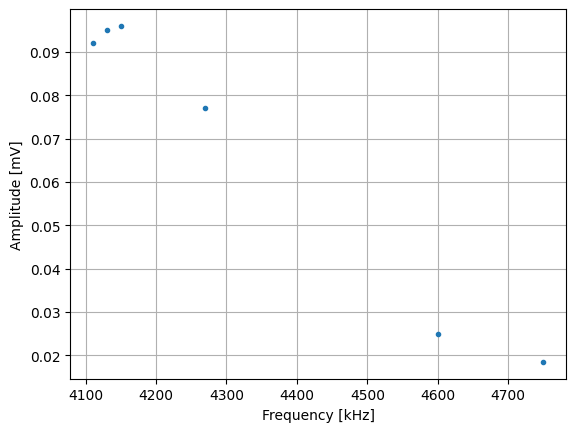

In [4]:
# Distance = 1cm
f = np.array([4110, 4130, 4150, 4270, 4600, 4750])  #Hz
f_err = np.array([10, 10, 10, 20])  #Hz
amp = np.array([92, 95, 96, 77, 25, 18.5]) / 1000  #mV +- 0.05
amp_err = np.array([1, 1.5, 2, 1, .5, 1]) / 1000  #mV +- 0.05
plt.figure(1)
plt.plot(f, amp, '.')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Amplitude [mV]')
plt.grid()

The highest amplitude was at **4.15 kHz** thus we will make measurements using such a frequency. Below, we measure distance in _mm_ and phase shift in _degrees_.

Function **np.radians** will automatically convert angles from _degrees_ to _radians_.

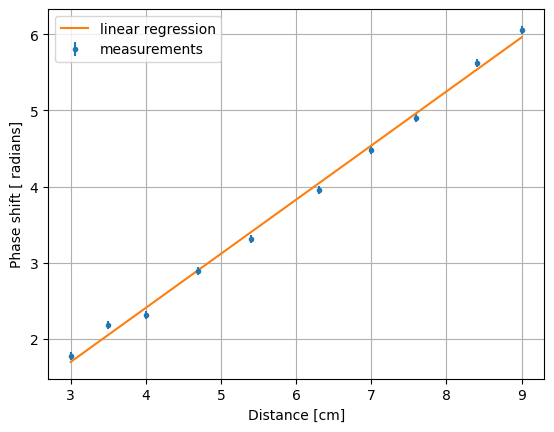

In [26]:
f = 4.15  #kHz
zamzam_x = 70.1  # initial distance [cm] +- 2 mm
dx = np.array([73.1, 73.6, 74.1, 74.8, 75.5, 76.4, 77.1, 77.7, 78.5, 79.1, ]) - zamzam_x  # distance [cm] +- 2 mm
phase = np.array([102, 125, 133, 166, -170, -133, -103, -79.5, -38, -13, ])  # phase shift [deg]
phase = np.radians((phase + 360) % 360)
phase_err = np.radians([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ])   # phase shift error [deg]
plt.figure(2)
plt.errorbar(dx, phase, yerr=phase_err, fmt='.', label='measurements')
plt.xlabel('Distance [cm]')
plt.ylabel('Phase shift [ radians]')
plt.grid()

# Fit a line into the measured data
reg = linregress(dx, phase)
y = reg.slope * dx + reg.intercept
plt.plot(dx, y, label='linear regression')
plt.legend()

**Figure 2.** Phase phift vs distance.

Calculate wavelength and speed of sound using measured data

In [28]:
lam = 2 * np.pi / reg.slope
print("Wavelength of sound in air is ", lam, "cm")
v = lam * f * 10
print("Speed of sound in air, v, is ", v, " m/s")
(367-345)/345

Wavelength of sound in air is  8.853051070134086 cm
Speed of sound in air, v, is  367.40161941056454  m/s


0.06376811594202898

### Part 2. Measuring the speed of sound in different gases

Example below contains only one measurement (wave without reflections). 
Here _L_ is your tube length in meters.
In reality, the sound pulse will bounce between the ends of the tube and you will see several arrivals separated by distance 1L, 3L, 5L, 7L, etc.

For robustness of measurements please make at least 4 travel time measurements and get average travel time for all arrivals. Mind that each pulse will travel different distance (1L, 3L, 5L, etc.)! 

In [41]:
#Measuring wave speed in long gas cylinder

TIME_ERROR = 0.002 # ms
#Air
L = 1.96  # length of the cylinder [m]
time_in_air = 5.65e-3  # travel time of the pulse [s]
speed_in_air = L / time_in_air
print("v_air: ", speed_in_air, " m/s")

#Helium
time_in_helium = (2.24+2.234)/1000  # travel time of the pulse [s]
speed_in_helium = L / time_in_helium
print("v_He: ", speed_in_helium, " m/s")

#CO2
time_in_co2 = (7.236+7+7.005+7.24)/4/1000  # travel time of the pulse [s]
speed_in_co2 = L / time_in_co2
print("v_CO2: ", speed_in_co2, " m/s")

v_air:  346.9026548672567  m/s
v_He:  438.08672329012063  m/s
v_CO2:  275.2712334538815  m/s


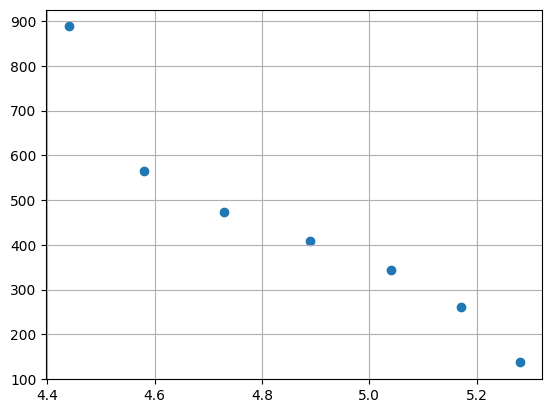

In [47]:
# Resonance
amp_2 = np.array([890,564,474,408, 344, 260,137])
freq = np.array([4.44,4.58, 4.73,4.89, 5.04,5.17,5.28])
plt.grid()
plt.scatter(freq, amp_2)

### Part 3. Eigenfrequencies in a tube

Here, we will make only one measurement in a tube filled with air. 

Computed speed of sound: 347.90 m/s with estimated error of 1.52 m/s


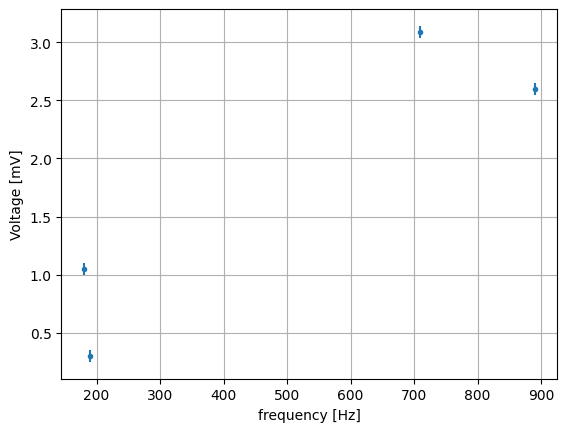

In [8]:
L = 980e-3
L_err = 1e-3

f_meas = np.array([180, 190, 710, 890])

V_meas = np.array([1.05, 0.3, 3.09, 2.6]) * 1e-3

V_err = 0.05e-3

plt.figure()
plt.errorbar(f_meas, V_meas * 1e3, V_err * 1e3, 0, '.')
plt.xlabel('frequency [Hz]')
plt.ylabel('Voltage [mV]')
plt.grid()
f_err = 1
f_peak = np.array([180, 350])  # frequency of the peak [Hz]
Order = np.array([1, 2])  # number of the peak (i.e., Order)

v_air_room = speed_in_air  # sound speed of air measured in previous steps
v_air_meas = 2 * L * f_peak / Order
v_air_err = v_air_meas * np.sqrt((L_err / L) ** 2 + (f_err / f_peak) ** 2)
print('Computed speed of sound: %.2f m/s with estimated error of %.2f m/s' % (np.average(v_air_meas),
                                                                              np.average(v_air_err)))

**Figure 3.** Eigenfrequencies of the resonator: voltage vs frequency.

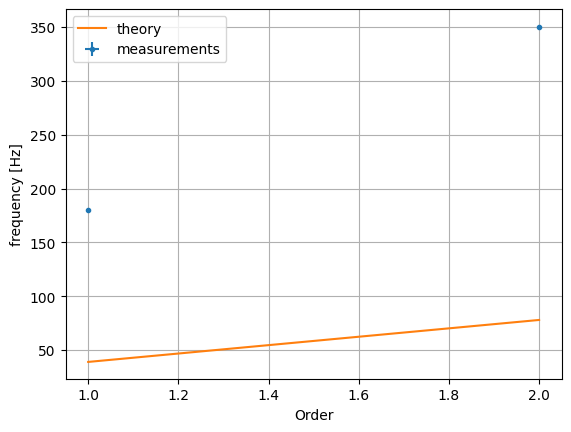

In [42]:
f_peak_th = Order * v_air_room / (2 * L)

plt.figure()
plt.errorbar(Order, f_peak, f_err, 0, '.', label='measurements')
plt.plot(Order, f_peak_th, label='theory')
plt.xlabel('Order')
plt.ylabel('frequency [Hz]')
plt.grid()
plt.legend();

**Figure 4.** Frequency vs order of the resonator.

### Part 5. Standing waves.

In [10]:
# Define a function for curve fitting
def f(x, a, lam, phi):
    pi = scipy.constants.pi  #3.14
    L = 27  #cm
    return abs(2 * a * np.cos(pi * (2 * x - L) / lam + phi / 2))


distance = np.array([0.03, 0.033, 0.036])  #meter

amplitude = np.array([78.5, 49.7, 26])  #mV

a = 4
lamb = 0.08  # wavelength of sound used [cm]
params, cov = cfit(f, distance, amplitude, p0=[a, lamb, 0])
y_pred = f(distance, *params)
Rsq = r2_score(amplitude, y_pred)

plt.figure()
plt.plot(distance, amplitude, '.', label='measured amplitude')
plt.plot(distance, f(distance, params[0], params[1], params[2]), label=' fitted curve ')
plt.xlabel('distance of buzzer')
plt.ylabel('measured amplitude')
plt.legend()
plt.grid()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

**Figure 5.** Standing wave: Measured value and fitted curve.